# Análise Exploratória da Ação BBAS3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
import os
os.getcwd()
print(os.listdir("../data/raw"))

df_check = pd.read_csv('../data/raw/BBAS3.SA.csv')
print(df_check.columns)

df_check.head(10)

['BBAS3.SA.csv', 'novos_dados.csv', 'teste.py']
Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


,Price,Close,High,Low,Open,Volume
0,Ticker,BBAS3.SA,BBAS3.SA,BBAS3.SA,BBAS3.SA,BBAS3.SA
1,Date,NaN,NaN,NaN,NaN,NaN
2,2018-01-02,10.45298957824707,10.45298957824707,10.186347830316473,10.186347830316473,18356200
3,2018-01-03,10.586310386657715,10.60853043254334,10.41807255040893,10.50695273395143,16361400
4,2018-01-04,10.687889099121094,10.7799442756093,10.618055181528142,10.640275229521599,19250400
5,2018-01-05,10.687889099121094,10.760899212130221,10.56726632741427,10.69741284176243,10535600
6,2018-01-08,10.71328353881836,10.71328353881836,10.583137031671747,10.67836597650312,10261200
7,2018-01-09,10.61170482635498,10.729153806773322,10.595833538877088,10.662493672825205,11645000
8,2018-01-10,10.567266464233398,10.662495415567157,10.418073673572694,10.53869765774309,10140000
9,2018-01-11,10.808510780334473,10.86247460747251,10.586309136810248,10.611704163910863,19368800


In [15]:
df = pd.read_csv('../data/raw/BBAS3.SA.csv', skiprows=2)
print(df.columns)

df.columns = df.columns.str.strip()
print(df.columns)


Index(['Date', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')
Index(['Date', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')


In [20]:
import pandas as pd

# Ignora as linhas 2 e 3 do arquivo (índices 1 e 2)
df = pd.read_csv('../data/raw/BBAS3.SA.csv', skiprows=[1, 2])

# Renomeia a coluna 'Price' para 'Date'
df.rename(columns={'Price': 'Date'}, inplace=True)

# Converte a coluna Date para datetime
df['Date'] = pd.to_datetime(df['Date'])

# Ordena e cria a média móvel
df.sort_values('Date', inplace=True)
df['Price'] = df['Close'].rolling(window=3).mean()

print(df.head())



        Date      Close       High        Low       Open    Volume      Price
0 2018-01-02  10.452990  10.452990  10.186348  10.186348  18356200        NaN
1 2018-01-03  10.586310  10.608530  10.418073  10.506953  16361400        NaN
2 2018-01-04  10.687889  10.779944  10.618055  10.640275  19250400  10.575730
3 2018-01-05  10.687889  10.760899  10.567266  10.697413  10535600  10.654030
4 2018-01-08  10.713284  10.713284  10.583137  10.678366  10261200  10.696354


In [21]:
df.sort_values('Date', inplace=True)
df['MA_3'] = df['Close'].rolling(window=3).mean()
df['Pct_Change'] = df['Close'].pct_change()
q1 = df['Close'].quantile(0.25)
q3 = df['Close'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['Outlier'] = (df['Close'] < lower_bound) | (df['Close'] > upper_bound)
df.head()

,Date,Close,High,Low,Open,Volume,Price,MA_3,Pct_Change,Outlier
0,2018-01-02,10.452990,10.452990,10.186348,10.186348,18356200,NaN,NaN,NaN,False
1,2018-01-03,10.586310,10.608530,10.418073,10.506953,16361400,NaN,NaN,0.012754,False
2,2018-01-04,10.687889,10.779944,10.618055,10.640275,19250400,10.575730,10.575730,0.009595,False
3,2018-01-05,10.687889,10.760899,10.567266,10.697413,10535600,10.654030,10.654030,0.000000,False
4,2018-01-08,10.713284,10.713284,10.583137,10.678366,10261200,10.696354,10.696354,0.002376,False


## Gráfico de Fechamento e Média Móvel

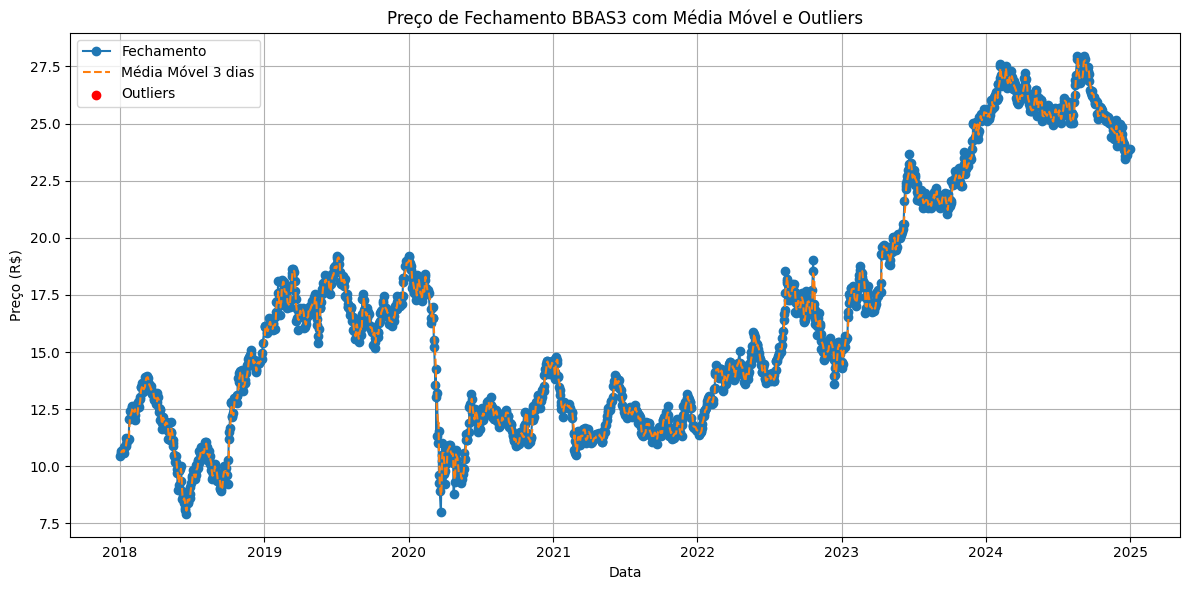

In [22]:

plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"], label="Fechamento", marker='o')
plt.plot(df["Date"], df["MA_3"], label="Média Móvel 3 dias", linestyle="--")
plt.scatter(df[df["Outlier"]]["Date"], df[df["Outlier"]]["Close"], color="red", label="Outliers")
plt.legend()
plt.title("Preço de Fechamento BBAS3 com Média Móvel e Outliers")
plt.xlabel("Data")
plt.ylabel("Preço (R$)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Variação Percentual Diária

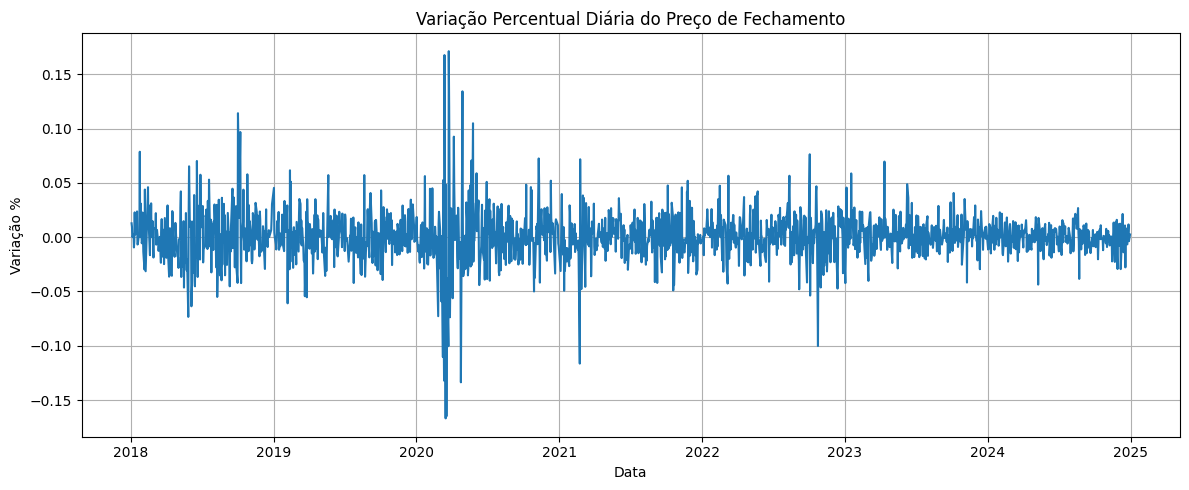

In [23]:

plt.figure(figsize=(12,5))
sns.lineplot(data=df, x="Date", y="Pct_Change")
plt.title("Variação Percentual Diária do Preço de Fechamento")
plt.xlabel("Data")
plt.ylabel("Variação %")
plt.grid(True)
plt.tight_layout()
plt.show()


## Distribuição de Volume

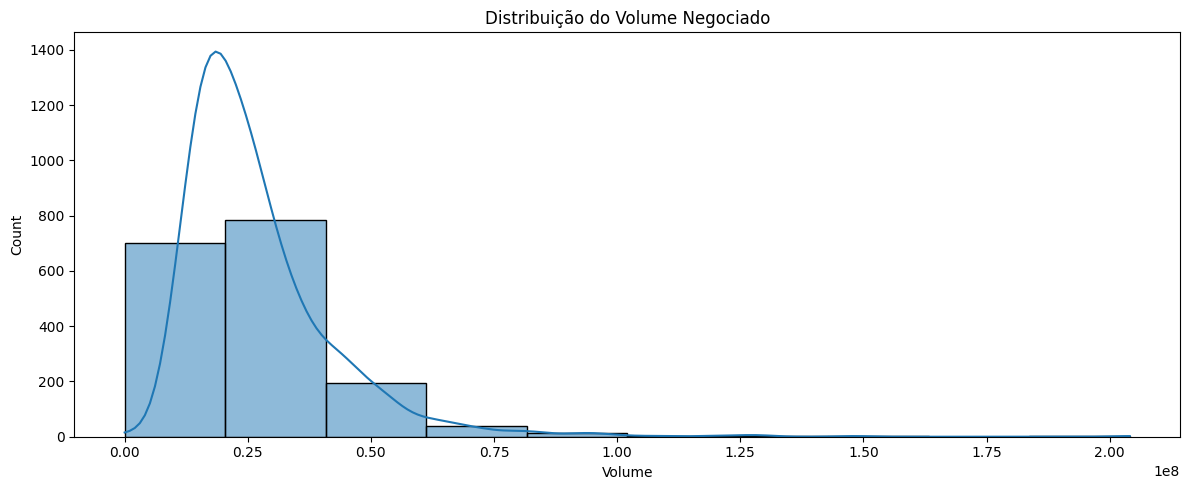

In [24]:

plt.figure(figsize=(12,5))
sns.histplot(df["Volume"], kde=True, bins=10)
plt.title("Distribuição do Volume Negociado")
plt.xlabel("Volume")
plt.tight_layout()
plt.show()
